<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#The-dataset" data-toc-modified-id="The-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The dataset</a></span><ul class="toc-item"><li><span><a href="#Categorical-columns-info" data-toc-modified-id="Categorical-columns-info-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Categorical columns info</a></span></li></ul></li><li><span><a href="#Data-Wranging" data-toc-modified-id="Data-Wranging-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Wranging</a></span><ul class="toc-item"><li><span><a href="#Column-analysis" data-toc-modified-id="Column-analysis-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Column analysis</a></span></li><li><span><a href="#Column-Transformation-for-Logistic-Regression" data-toc-modified-id="Column-Transformation-for-Logistic-Regression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Column Transformation for Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#BusinessTravel" data-toc-modified-id="BusinessTravel-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>BusinessTravel</a></span></li><li><span><a href="#Department" data-toc-modified-id="Department-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Department</a></span></li><li><span><a href="#EducationField" data-toc-modified-id="EducationField-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>EducationField</a></span></li><li><span><a href="#Gender" data-toc-modified-id="Gender-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Gender</a></span></li><li><span><a href="#JobRole" data-toc-modified-id="JobRole-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>JobRole</a></span></li></ul></li></ul></li></ul></div>

# Introduction

This dataset includes fictional data created by IBM data scientists, with information about the IBM employees and wether the employee left the company or not. The dataset can be found [here](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset).

The objective is to predict, based on the data available, wether an employee will leave the company or not

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# The dataset

In [2]:
employees = pd.read_csv(r'C:\Users\Tiago McDonald\Documents\GitHub\Projects\Classification Model\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
employees.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In this dataset we have:
    * 35 columns
    * 1470 data points
    * No missing values
    * 26 numerical columns and 9 object columns

We'll need to check the columns that are object, in order to transform them to categorical or ordinal values

## Categorical columns info

Education
   * 1 'Below College'
   * 2 'College'
   * 3 'Bachelor'
   * 4 'Master'
   * 5 'Doctor'

EnvironmentSatisfaction
   * 1 'Low'
   * 2 'Medium'
   * 3 'High'
   * 4 'Very High'

JobInvolvement
   * 1 'Low'
   * 2 'Medium'
   * 3 'High'
   * 4 'Very High'

JobSatisfaction
   * 1 'Low'
   * 2 'Medium'
   * 3 'High'
   * 4 'Very High'

PerformanceRating
   * 1 'Low'
   * 2 'Good'
   * 3 'Excellent'
   * 4 'Outstanding'

RelationshipSatisfaction
   * 1 'Low'
   * 2 'Medium'
   * 3 'High'
   * 4 'Very High'

WorkLifeBalance
   * 1 'Bad'
   * 2 'Good'
   * 3 'Better'
   * 4 'Best'

# Data Wranging

## Column analysis

We are going to see if there are columns that could be dropped. We have 35 columns, which is a lot, so we might drop the ones that have high correlation, in order to avoid multicollinearity

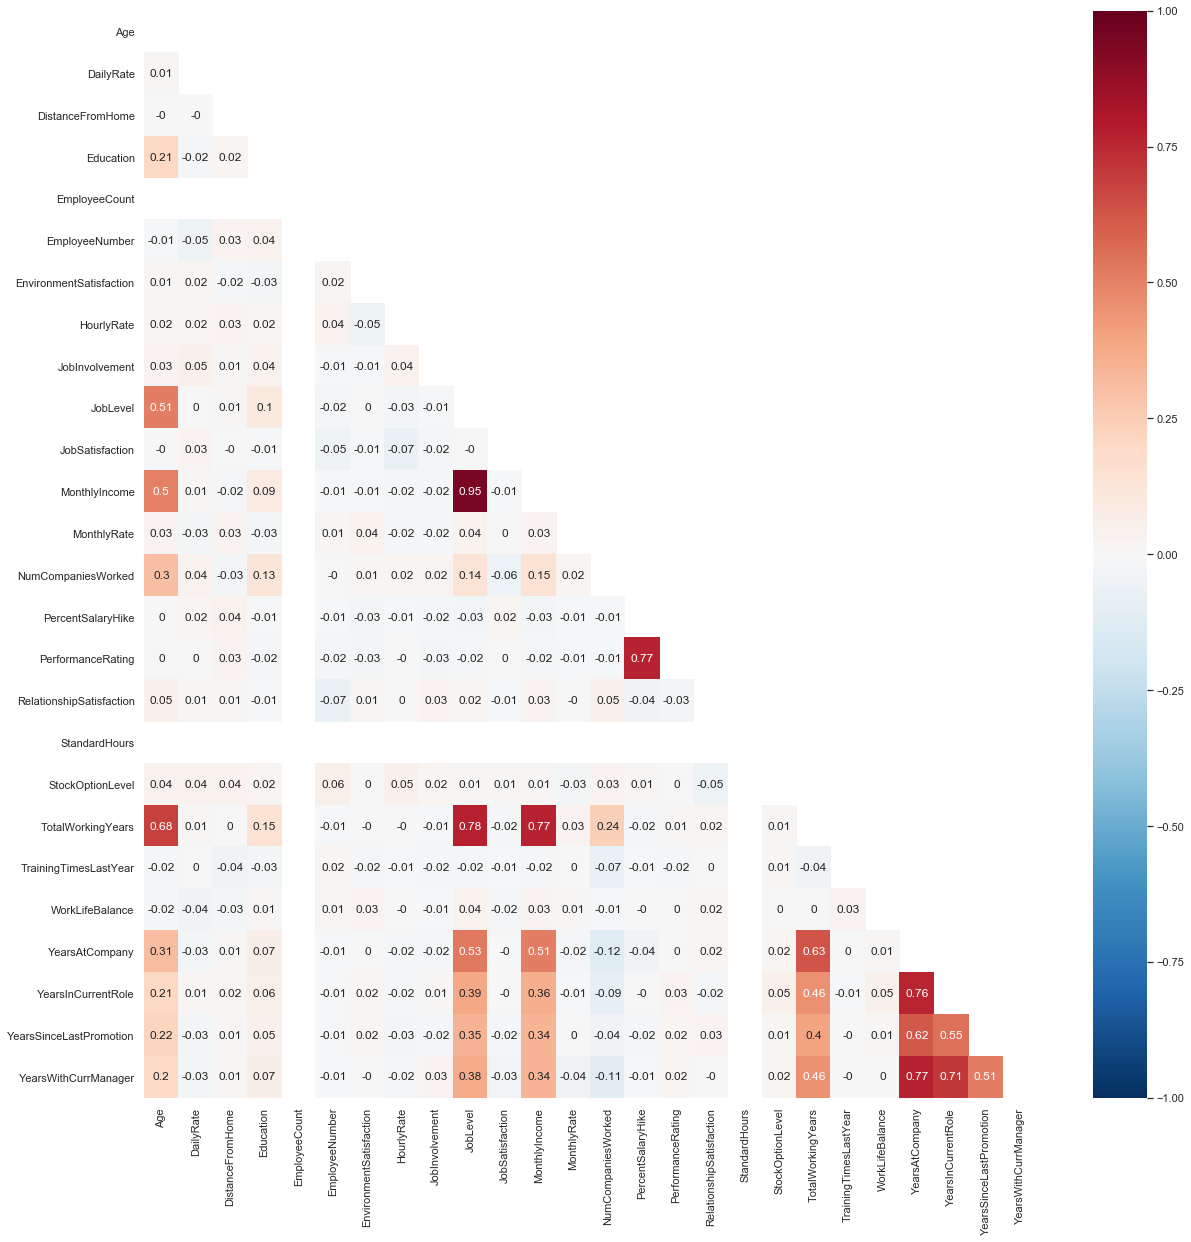

In [5]:
corr = employees.corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(ax=ax, data=corr, mask=mask, annot=True, center=0, vmin=-1, vmax=1, cmap="RdBu_r");
    fig.savefig('heatmap.png')

Almost every column has a low correlation with each other, **except for JobLevel and MonthlyIncome, which have a correlation of 0.95**. Also, There are two columns which don't have any correlation with the rest of columns: **StandardHours and EmployeeCount**. We will look into those to see what values they have. As for the JobLevel and MonthlyIncome, we will drop the JobLevel column because it also has a high correlation with TotalWorkingYears.

In [6]:
employees.JobLevel.unique()

array([2, 1, 3, 4, 5], dtype=int64)

In [7]:
employees.drop('JobLevel', axis=1, inplace=True)

In [8]:
employees.drop(['StandardHours','EmployeeCount'], axis=1, inplace=True)

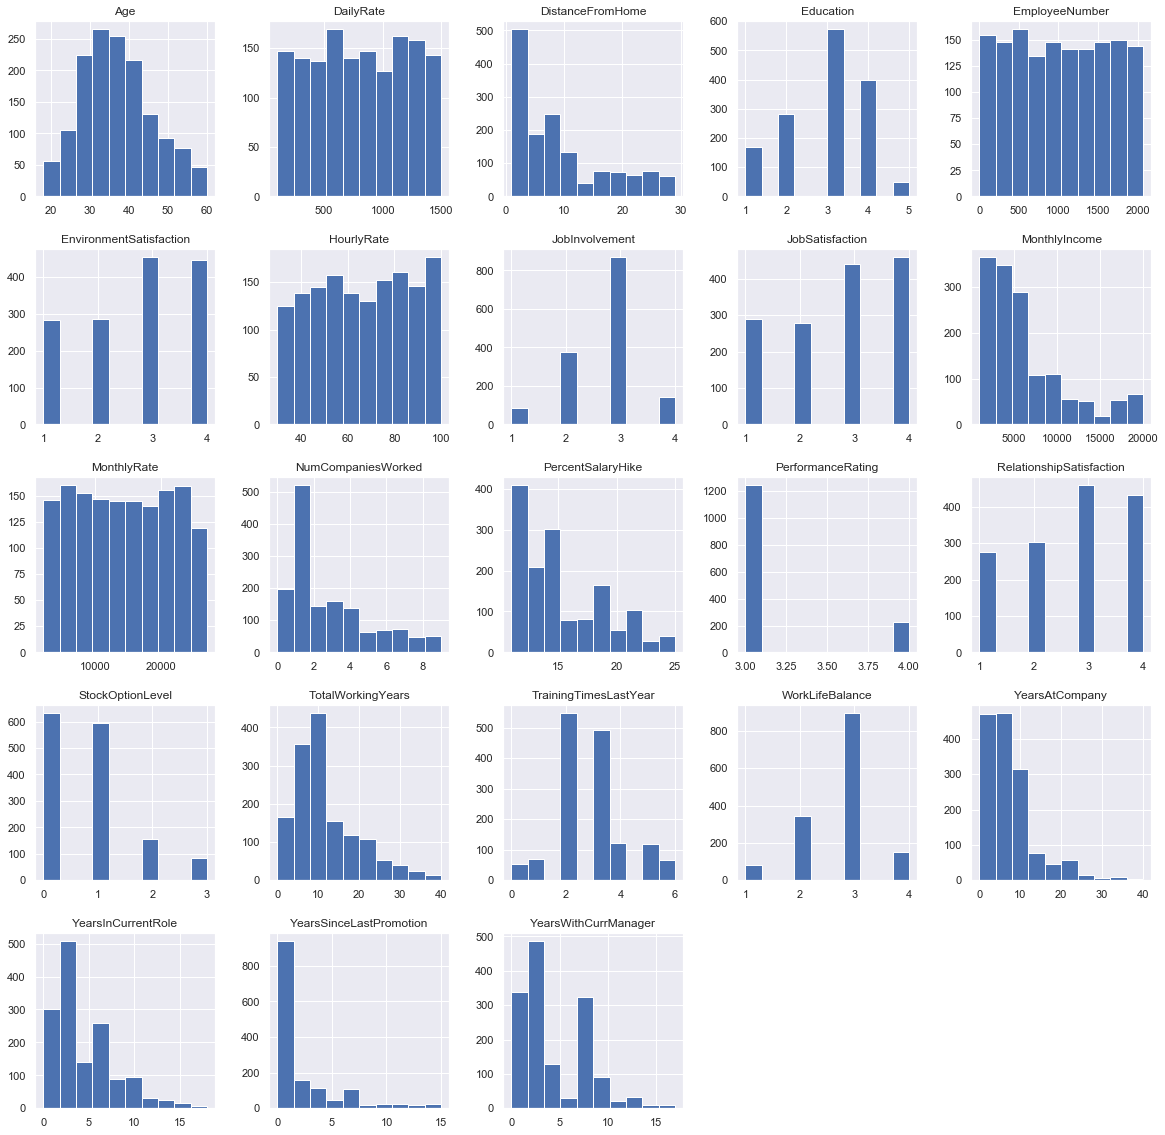

In [9]:
employees.hist(figsize=(20,20));

In [10]:
employees.Attrition.unique()

array(['Yes', 'No'], dtype=object)

The Attrition column has the values that we want to predict, so this is the **dependant variable**. We'll need to convert the values Yes and No to numerical

In [11]:
employees.Attrition = employees.Attrition.map({'Yes': 1, 'No': 0})

## Column Transformation for Logistic Regression

In this stage we're going to create a copy of the dataset so that the copy can be used for logistic regression since this one will have transformed columns and dummies

In [12]:
employees_reg = employees.copy()

### BusinessTravel

In [13]:
employees_reg.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

These categories are ordinal, so we'll convert them to numerical

In [14]:
employees_reg.BusinessTravel = employees.BusinessTravel.map({'Non-Travel':0
                              ,'Travel-Rarely':1
                              ,'Travel_Frequently':2})

### Department

In [15]:
employees_reg.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

This column has nominal values, so we'll convert this column to dummies

In [16]:
dummies = []
dummies.append('Department')

### EducationField

In [18]:
employees_reg[['Education','EducationField']]

,Education,EducationField
0,2,Life Sciences
1,1,Life Sciences
2,2,Other
3,4,Life Sciences
4,1,Medical
...,...,...
1465,2,Medical
1466,1,Medical
1467,3,Life Sciences
1468,3,Medical


The EducationField column has the name of the field. But we already have the Education column, which is already transformed. So we might not need the EducationField column. Let's check how many unique values it has.

In [19]:
employees_reg.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

It doesn't have too many unique values, so we'll keep it for now and add it to the dummies list

In [20]:
dummies.append('EducationField')

### Gender

In [21]:
employees_reg.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [22]:
employees_reg.Gender = employees.Gender.map({'Female': 0, 'Male': 1})

### JobRole

In [23]:
employees_reg.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [24]:
dummies.append('JobRole')